# TASK #2 - To Explore Supervised Machine Learning

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Loading Data from remote link

In [2]:
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

## Viewing data sets

In [3]:
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting data points for finding relation between data sets

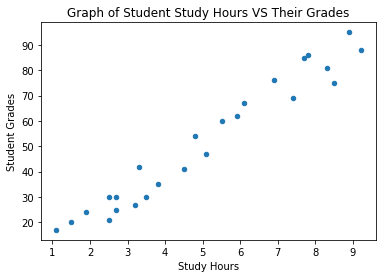

In [5]:
student_data.plot.scatter(x='Hours', y='Scores', style='o')  
plt.title('Graph of Student Study Hours VS Their Grades')  
plt.xlabel('Study Hours')  
plt.ylabel('Student Grades')  
plt.show()

## Data Preparation

In [6]:
student_data1 = student_data.corr()
student_data1.head()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values 

## Spliting Data

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Model Making

In [9]:
from sklearn.linear_model import LinearRegression  
LinearModel = LinearRegression()  
LinearModel.fit(X_train, y_train) 

print("Training of data is complete.")

Training of data is complete.


In [10]:
LinearModel.coef_, LinearModel.intercept_

(array([9.91065648]), 2.018160041434683)

## Plotting the Regression Line and for test data [Final Plot]

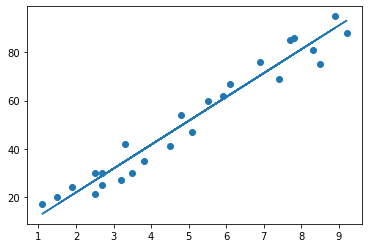

In [11]:
line = LinearModel.coef_*X+LinearModel.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

In [12]:
print(X_test)
y_pred = LinearModel.predict(X_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Comparing with Actual Data Sets

In [13]:
df = pd.DataFrame({'Actual Grade': y_test, 'Predicted grade': y_pred})  
df 

,Actual Grade,Predicted grade
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
y_pred = LinearModel.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Testing with Provided Data

In [15]:
hours = 9.25
own_pred = LinearModel.predict(np.array([hours]).reshape(1,1))
print("Study Hours = {}".format(hours))
print("Predicted Grade = {}".format(own_pred[0]))

Study Hours = 9.25
Predicted Grade = 93.69173248737538


## Evaluating The Model

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
